In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load training and test datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [11]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
#remove listing_id
numerical_columns = numerical_columns.drop('listing_id')
numerical_columns

Index(['manufactured', 'curb_weight', 'power', 'engine_cap', 'no_of_owners',
       'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv',
       'arf', 'indicative_price', 'price'],
      dtype='object')

In [14]:
len(numerical_columns)

14

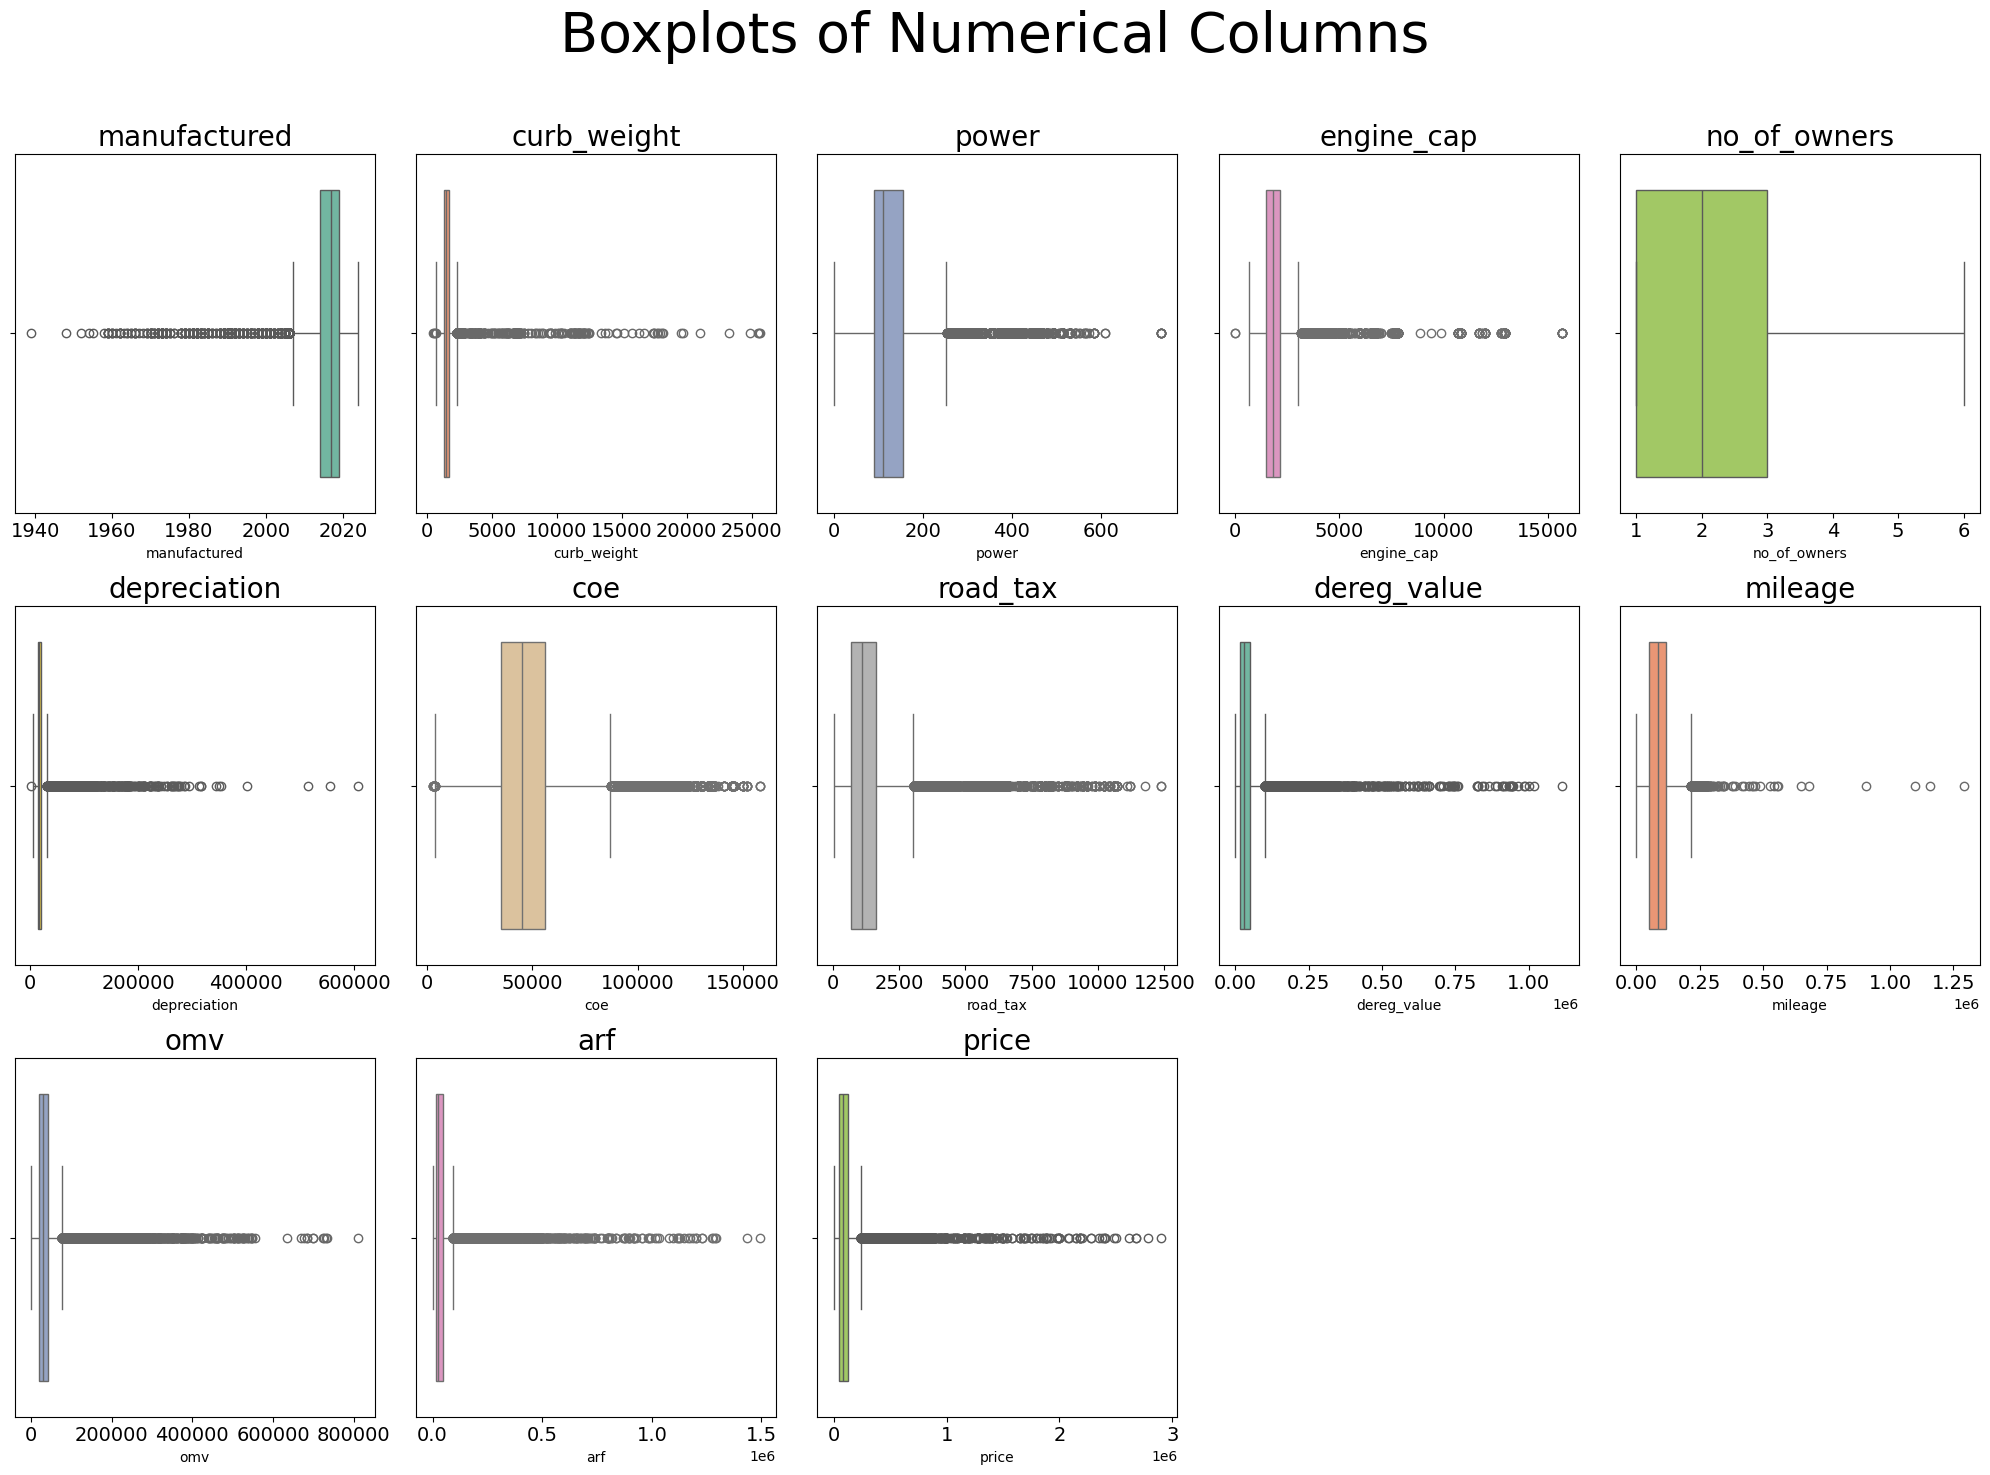

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the number of numerical columns
numerical_columns = [col for col in train_df.columns if train_df[col].dtype in ['float64', 'int64']]
numerical_columns.remove('listing_id')

# Filter out columns that have only unique or NaN values
valid_numerical_columns = [col for col in numerical_columns if train_df[col].nunique() > 1 and not train_df[col].isna().all()]

# Define a custom color palette
custom_colors = sns.color_palette("Set2", len(valid_numerical_columns))  # Customize the palette

# Create the subplots
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

# Set the main title and increase font size by 4 times (20)
fig.suptitle('Boxplots of Numerical Columns', fontsize=40)

# Flatten the axes array
axes = axes.flatten()

# Iterate through the valid numerical columns and axes
for i, col in enumerate(valid_numerical_columns[:len(axes)]):  # Limit to available axes
    sns.boxplot(x=train_df[col], ax=axes[i], color=custom_colors[i])
    
    # Set the title for each subplot and increase font size by 4 times
    axes[i].set_title(col, fontsize=20)
    
    # Optionally, set larger font size for x and y axis labels
    axes[i].tick_params(axis='both', which='major', labelsize=14)

# Hide any unused subplots if there are fewer columns than axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to not overlap with suptitle
plt.show()


In [27]:
# List of categorical columns
categorical_columns = [col for col in train_df.columns if train_df[col].dtype == 'object']

# Print value counts for each categorical column
for col in categorical_columns:
    print(f"\nValue counts for {col}:\n", train_df[col].value_counts())



Value counts for title:
 title
Honda Vezel 1.5A X                                       296
Honda Civic 1.6A VTi                                     185
Nissan Qashqai 1.2A DIG-T                                174
Mercedes-Benz C-Class C180 Avantgarde                    168
Toyota Dyna 150 3.0M                                     125
                                                        ... 
Toyota Corolla Altis 1.6A Elegance (COE till 12/2024)      1
Mitsubishi Lancer EX 1.5A GLS (COE till 01/2029)           1
Porsche Boxster S 3.4A Tip (COE till 03/2030)              1
Isuzu NPR75U Tipper                                        1
Hyundai LX2 Palisade 3.5A Sunroof                          1
Name: count, Length: 7263, dtype: int64

Value counts for make:
 make
toyota           3150
mercedes-benz    3019
bmw              2627
honda            2466
nissan           1355
                 ... 
aion                1
joylong             1
sinotruk            1
pontiac             1
td     

In [31]:
len(categorical_columns)

15

In [28]:
train_df['make'].value_counts()

make
toyota           3150
mercedes-benz    3019
bmw              2627
honda            2466
nissan           1355
                 ... 
aion                1
joylong             1
sinotruk            1
pontiac             1
td                  1
Name: count, Length: 95, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_47512\1526929309.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(truncated_labels)
C:\Users\User\AppData\Local\Temp\ipykernel_47512\1526929309.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(truncated_labels)
C:\Users\User\AppData\Local\Temp\ipykernel_47512\1526929309.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(truncated_labels)
C:\Users\User\AppData\Local\Temp\ipykernel_47512\1526929309.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(truncated_labels)


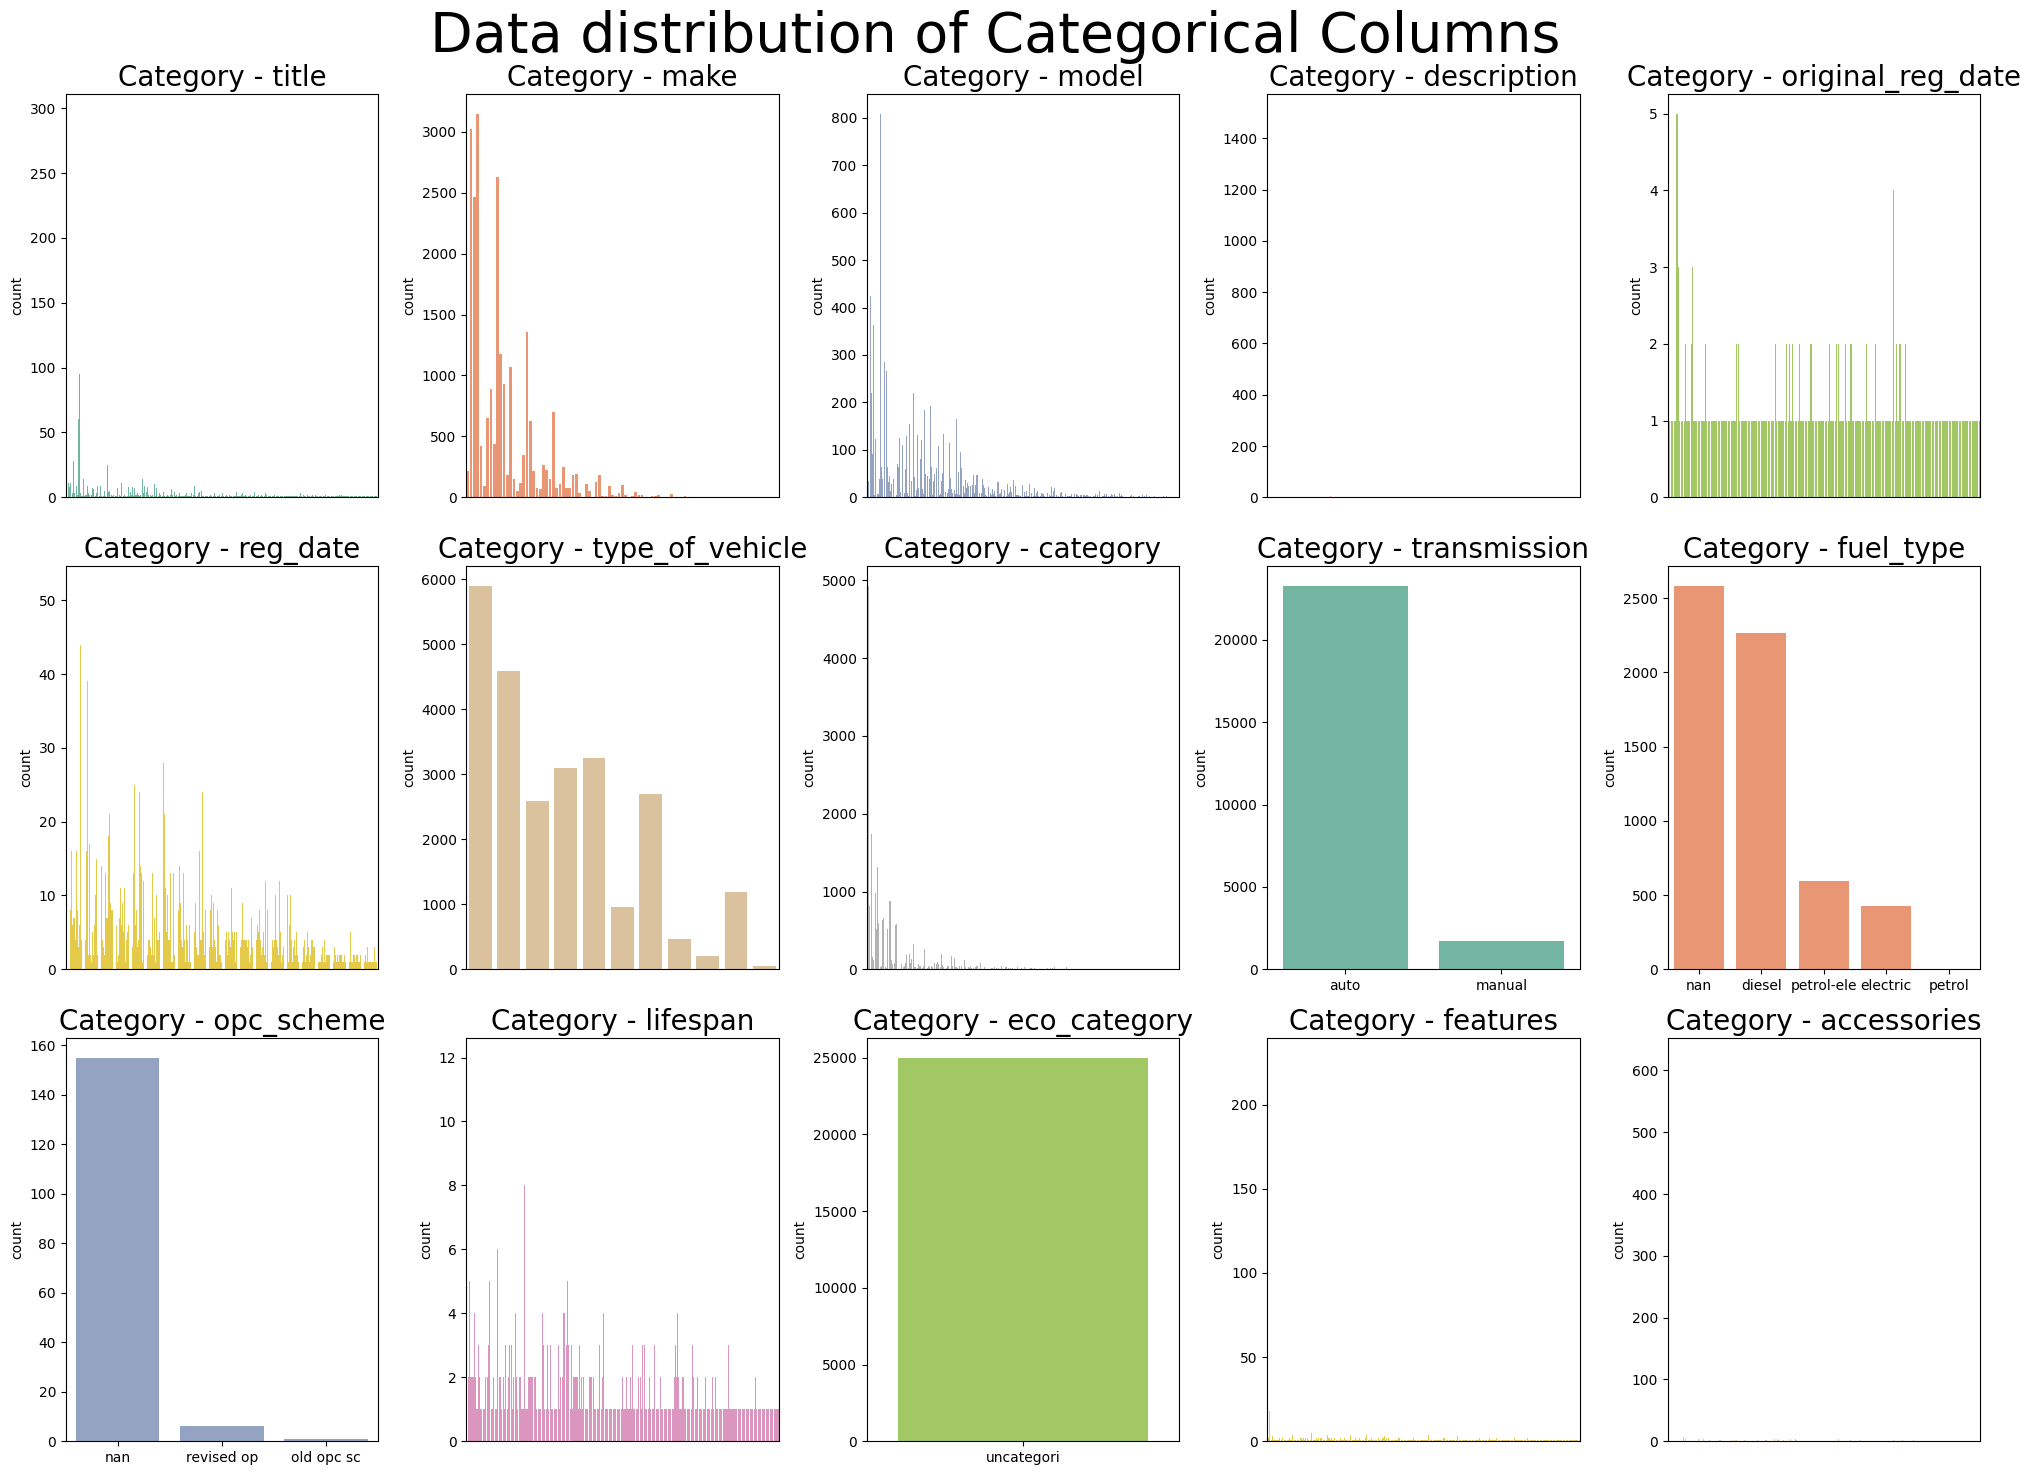

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to truncate string values to 10 characters
def truncate_labels(labels, max_length=10):
    return [str(label)[:max_length] if len(str(label)) > max_length else label for label in labels]

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
fig.suptitle("Data distribution of Categorical Columns", fontsize=40)
axes = axes.flatten()
custom_colors = sns.color_palette("Set2", len(categorical_columns))

# Iterate through categorical columns and plot count plots
for i, col in enumerate(categorical_columns[:len(axes)]):
    sns.countplot(data=train_df, x=col, ax=axes[i], color=custom_colors[i])
    axes[i].set_title(f'Category - {col}', fontsize=20)
    
    # Check the number of unique values in the column
    unique_values = train_df[col].nunique()
    
    if unique_values <= 5:
        # If unique values are fewer than 5, truncate labels
        x_labels = train_df[col].unique()
        truncated_labels = truncate_labels(x_labels)
        axes[i].set_xticklabels(truncated_labels)
        
        axes[i].tick_params(axis='x', labelsize=10)
    else:
        # Hide x-ticks if unique values are 5 or more
        axes[i].set_xticks([])
    axes[i].set_xlabel('')
# Hide any unused subplots if there are fewer categorical columns than axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [46]:
categorical_columns

['title',
 'make',
 'model',
 'description',
 'original_reg_date',
 'reg_date',
 'type_of_vehicle',
 'category',
 'transmission',
 'fuel_type',
 'opc_scheme',
 'lifespan',
 'eco_category',
 'features',
 'accessories']

C:\Users\User\AppData\Local\Temp\ipykernel_47512\874510128.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unique Values', y='Column', data=unique_counts_df, palette="viridis")


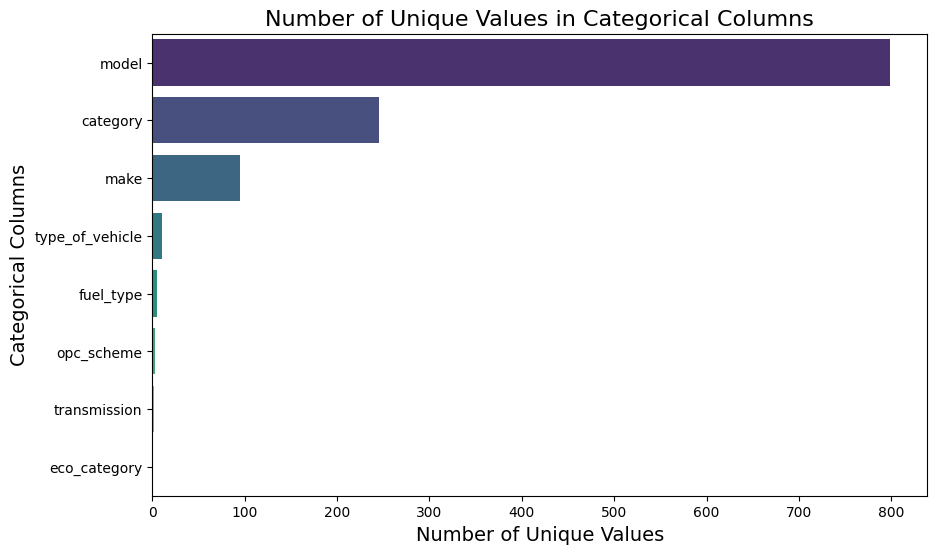

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming categorical_columns is already defined
# Calculate the number of unique values for each categorical column

categorical_columns_to_draw = [
 'make',
 'model',
 'type_of_vehicle',
 'category',
 'transmission',
 'fuel_type',
 'opc_scheme',
 'eco_category']

unique_counts = {col: train_df[col].nunique() for col in categorical_columns_to_draw}

# Convert the dictionary to a DataFrame for easier plotting
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])

# Sort the dataframe by the number of unique values (optional)
unique_counts_df = unique_counts_df.sort_values(by='Unique Values', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Unique Values', y='Column', data=unique_counts_df, palette="viridis")
plt.title('Number of Unique Values in Categorical Columns', fontsize=16)
plt.xlabel('Number of Unique Values', fontsize=14)
plt.ylabel('Categorical Columns', fontsize=14)
plt.show()


In [1]:
import pandas as pd

# Load your training data
train_df = pd.read_csv('./data/train.csv')

# Initialize an empty dictionary to store range details
range_details = {}

# Loop over each column in the DataFrame
for column in train_df.columns:
    if pd.api.types.is_numeric_dtype(train_df[column]):
        # For numerical columns, calculate min and max
        min_val = train_df[column].min()
        max_val = train_df[column].max()
        range_details[column] = f"{min_val} - {max_val}"
    else:
        # For categorical columns, calculate the number of unique values
        unique_count = train_df[column].nunique()
        range_details[column] = f"{unique_count} unique items"

# Convert the range details into a DataFrame for better presentation
range_df = pd.DataFrame(list(range_details.items()), columns=['Field Name', 'Range'])

# Display the DataFrame
print(range_df)


           Field Name               Range
0          listing_id    365241 - 1332660
1               title   7263 unique items
2                make     95 unique items
3               model    799 unique items
4         description  19765 unique items
5        manufactured     1939.0 - 2024.0
6   original_reg_date    219 unique items
7            reg_date   4705 unique items
8     type_of_vehicle     11 unique items
9            category    245 unique items
10       transmission      2 unique items
11        curb_weight     435.0 - 25620.0
12              power         0.0 - 735.0
13          fuel_type      5 unique items
14         engine_cap       0.0 - 15681.0
15       no_of_owners           1.0 - 6.0
16       depreciation   1770.0 - 607730.0
17                coe       2605 - 158004
18           road_tax      50.0 - 12375.0
19        dereg_value    11.0 - 1114652.0
20            mileage     1.0 - 1290000.0
21                omv    426.0 - 811764.0
22                arf    23.0 - 14

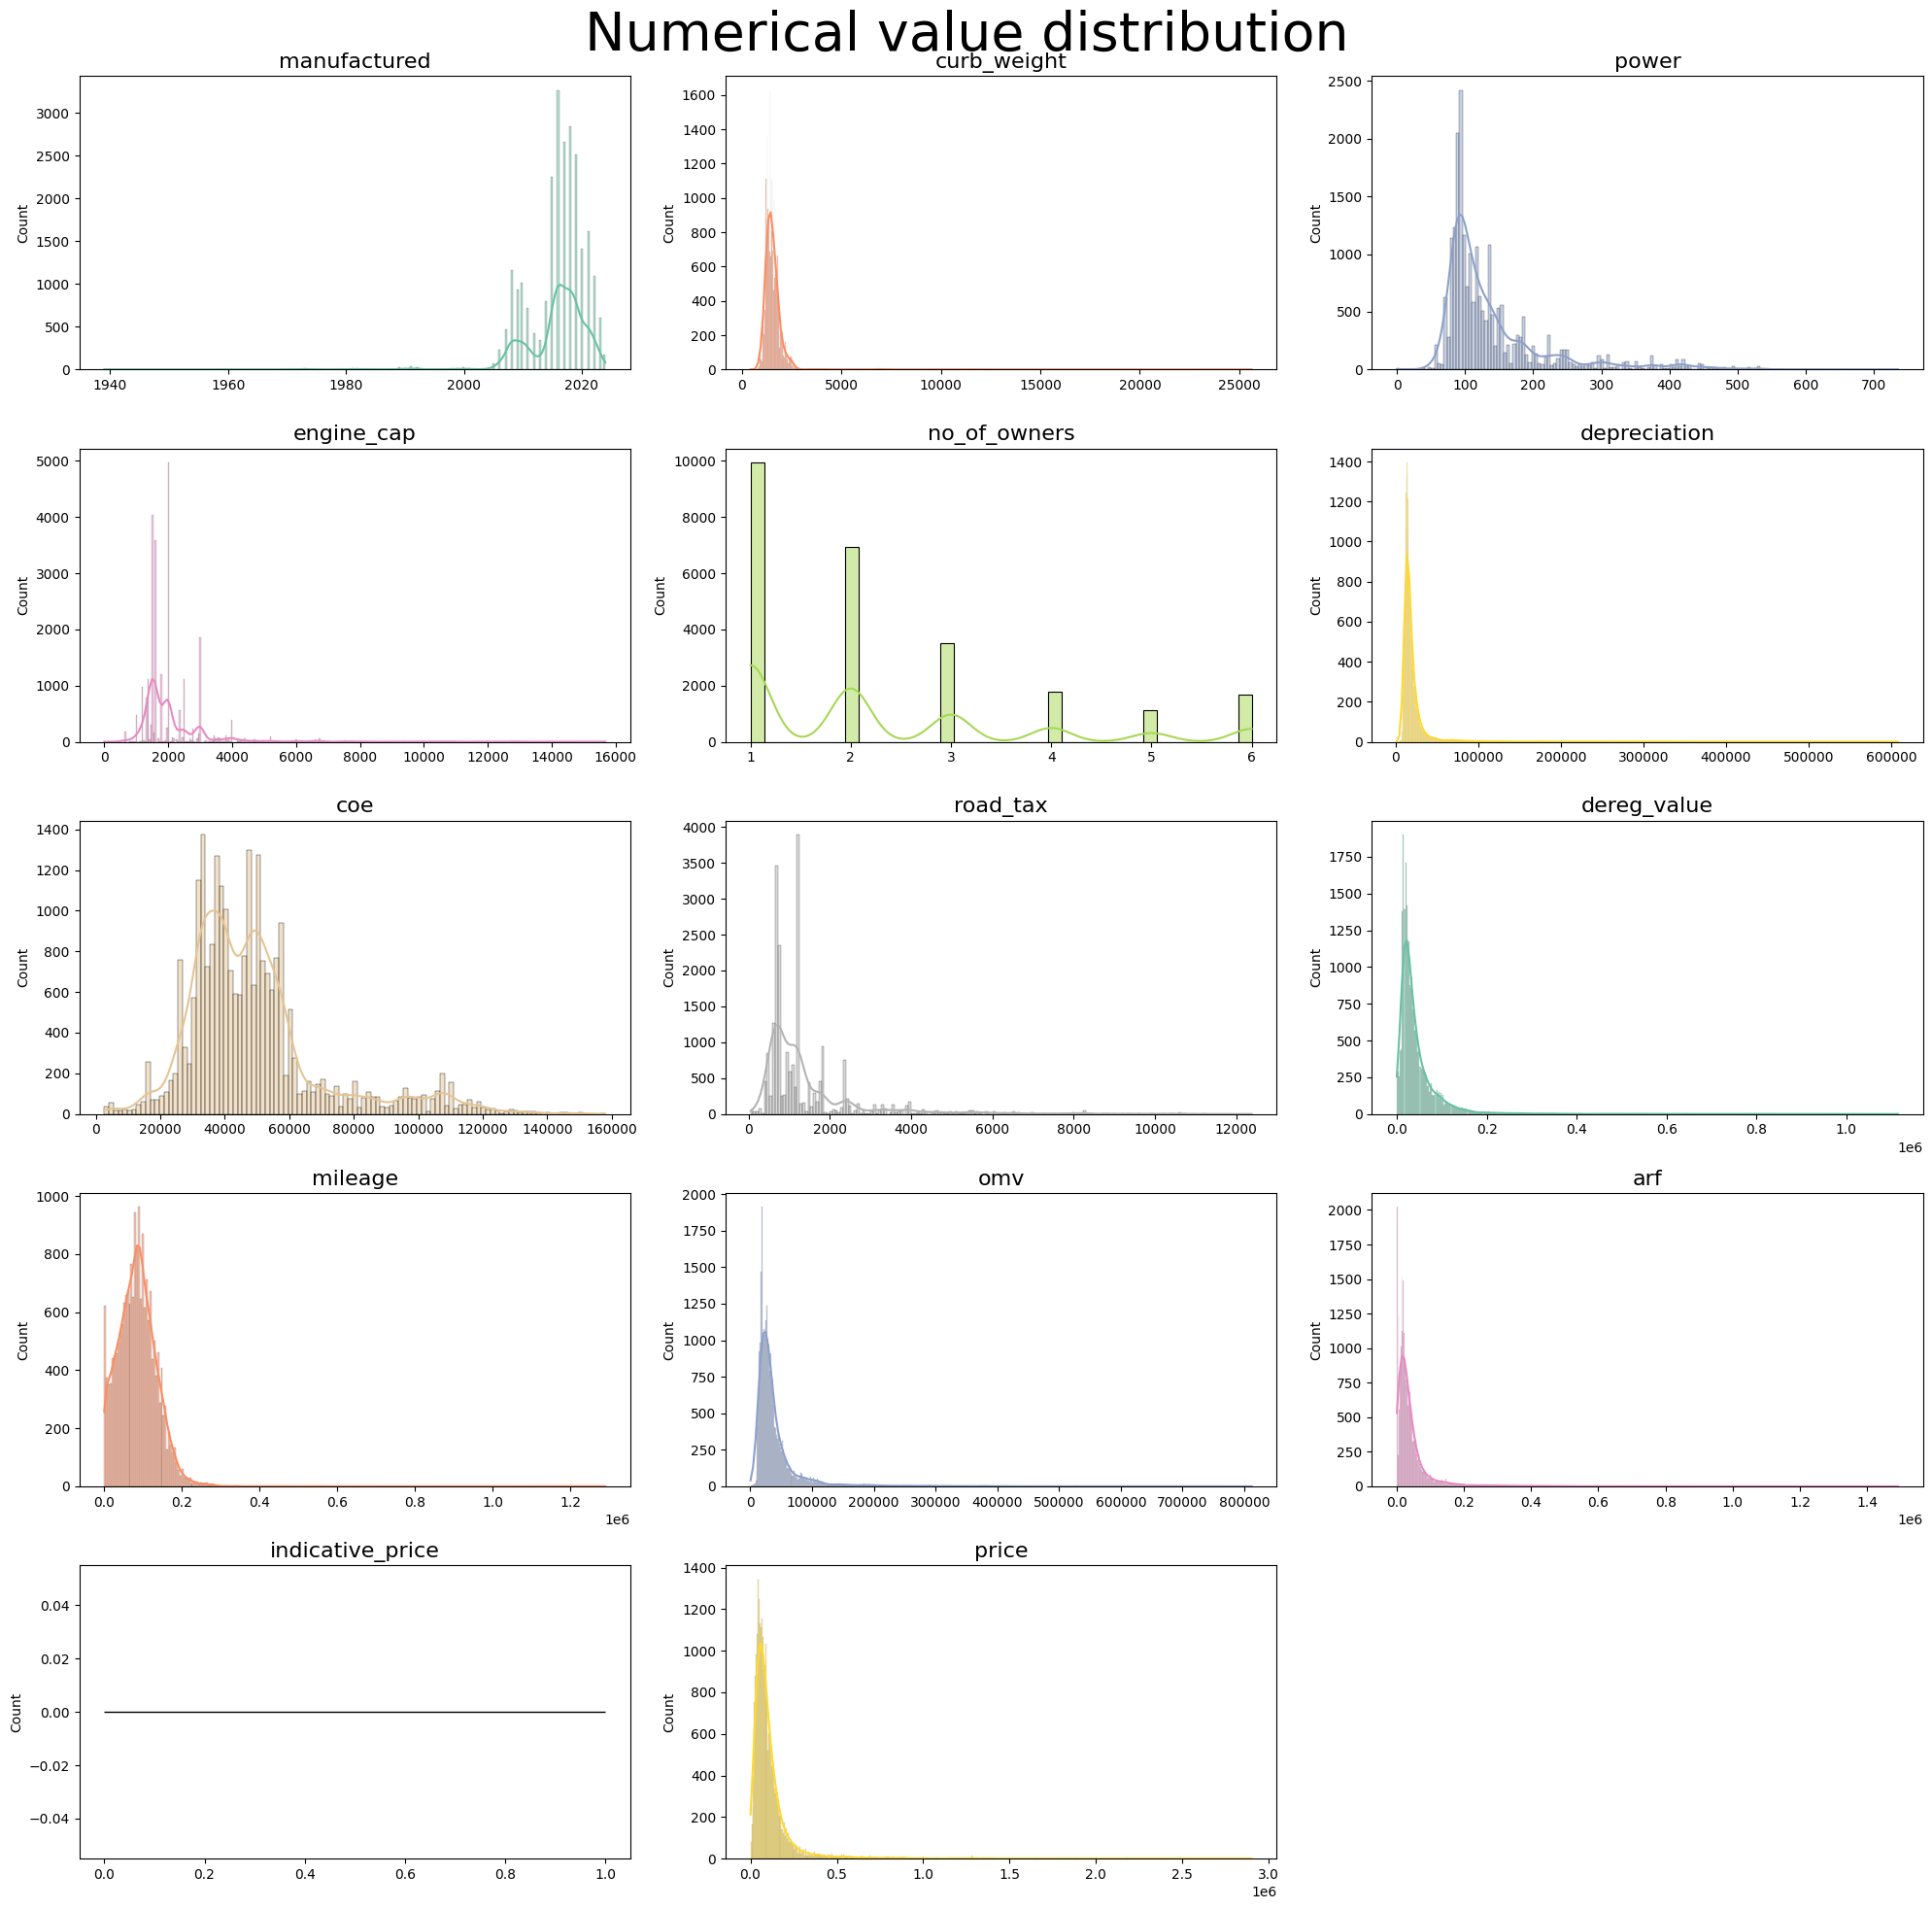

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical columns you want to plot
numerical_columns = [col for col in train_df.columns if train_df[col].dtype in ['float64', 'int64']]
numerical_columns.remove('listing_id')

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
fig.suptitle("Numerical value distribution", fontsize=40)
axes = axes.flatten()
custom_colors = sns.color_palette("Set2", len(numerical_columns))

# Plot distribution for numerical columns using histograms
for i, col in enumerate(numerical_columns[:len(axes)]):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i], color=custom_colors[i])
    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('')
    # axes[i].tick_params(axis='both', which='major', labelsize=12)

# Hide any unused subplots if there are fewer numerical columns than axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

